<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/HW7/autoencoder_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for time series
an autoencoder is a deep neural network that reproduces input data

it does so by progressively shrinking the size of the layers from the input size to a bottle neck and then expanding them back progressively to the initial size

note: the input and target are the same!

put your imports in the top cell

In [ ]:
#Deep leaarning imports
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

Cloning into 'acc2022treelinearcascades_stocks'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 0), reused 40 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 1.25 MiB | 19.11 MiB/s, done.


get the data by cloaning the repo https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

In [ ]:
These are stock price time series. Use the " Volume" column as your chosen time series

In [ ]:
ls

acc2022treelinearcascades_stocks/  sample_data/


In [ ]:
ls acc2022treelinearcascades_stocks/data

aapl.csv  cat.csv   dis.csv  hon.csv   jpm.csv  mrk.csv   trv.csv  wba.csv
amgn.csv  crm.csv   dow.csv  ibm.csv   ko.csv   msft.csv  unh.csv  wmt.csv
axp.csv   csco.csv  gs.csv   intc.csv  mcd.csv  nke.csv   v.csv
ba.csv    cvx.csv   hd.csv   jnj.csv   mmm.csv  pg.csv    vz.csv


check that all files have the same length. The system command `wc -l returns` the  number of lines (stands for "word count -lines")

In [ ]:
!wc -l acc2022treelinearcascades_stocks/data/*

   2516 acc2022treelinearcascades_stocks/data/aapl.csv
   2516 acc2022treelinearcascades_stocks/data/amgn.csv
   2516 acc2022treelinearcascades_stocks/data/axp.csv
   2516 acc2022treelinearcascades_stocks/data/ba.csv
   2516 acc2022treelinearcascades_stocks/data/cat.csv
   2516 acc2022treelinearcascades_stocks/data/crm.csv
   2516 acc2022treelinearcascades_stocks/data/csco.csv
   2516 acc2022treelinearcascades_stocks/data/cvx.csv
   2516 acc2022treelinearcascades_stocks/data/dis.csv
    542 acc2022treelinearcascades_stocks/data/dow.csv
   2516 acc2022treelinearcascades_stocks/data/gs.csv
   2516 acc2022treelinearcascades_stocks/data/hd.csv
   2516 acc2022treelinearcascades_stocks/data/hon.csv
   2516 acc2022treelinearcascades_stocks/data/ibm.csv
   2516 acc2022treelinearcascades_stocks/data/intc.csv
   2516 acc2022treelinearcascades_stocks/data/jnj.csv
   2516 acc2022treelinearcascades_stocks/data/jpm.csv
   2516 acc2022treelinearcascades_stocks/data/ko.csv
   2516 acc2022treelinearcas

In [ ]:
#create a list of all files you want to load
files = glob.glob("acc2022treelinearcascades_stocks/data/*")

In [ ]:
excluded_file = "acc2022treelinearcascades_stocks/data/dow.csv"

In [ ]:
files = [f for f in files if f != excluded_file]

In [ ]:
num_files = len(files)
file_lengths = []

for file in files:
    with open(file, 'r') as f:
        file_lengths.append(sum(1 for _ in f))

# Check if all files have the same length
if len(set(file_lengths)) != 1:
    raise ValueError("Not all files have the same number of lines.")

# Calculate the shape of each file
file_length = file_lengths[0]  # all files have same length
data = np.zeros((num_files, file_length))


 read in all the data into the array

In [ ]:
for i, file in tqdm(enumerate(files), total=len(files)):
    with open(file, 'r') as f:
        for j, line in enumerate(f):
          if j > 0: # Skip header row
            try:
              data[i, j-1] = float(line.strip().split(',')[-1])
            except (ValueError, IndexError):
              print(f"Error processing line {j} in file {file}. Skipping line.")


100%|██████████| 29/29 [00:00<00:00, 410.76it/s]


plot the time series

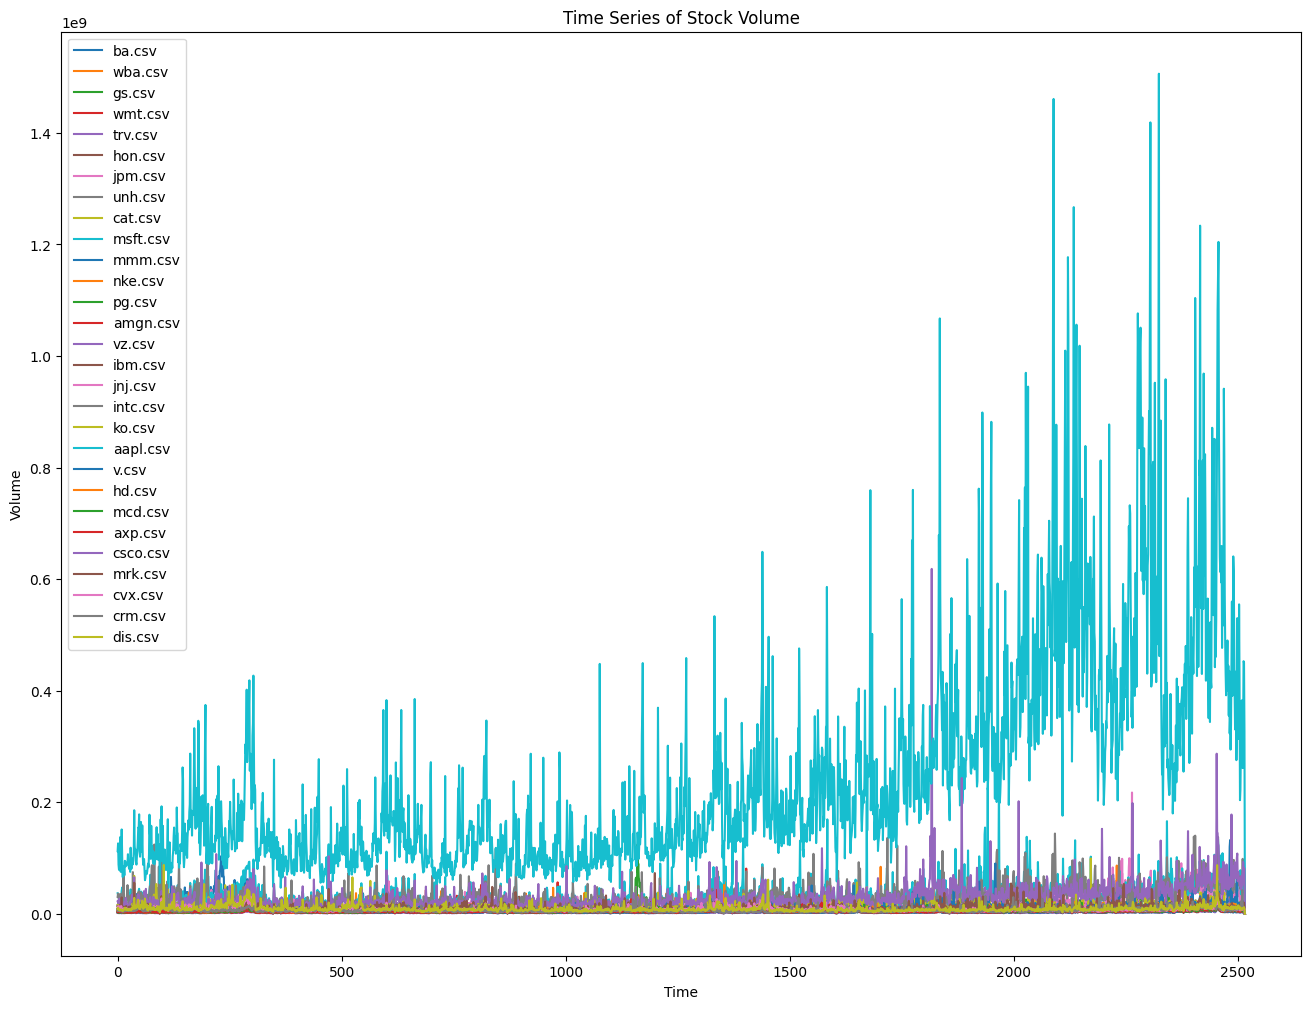

In [ ]:

plt.figure(figsize=(16, 12))
for i in range(data.shape[0]):
    plt.plot(data[i, :], label=files[i].split('/')[-1])
plt.xlabel("Time")
plt.ylabel("Volume")
plt.title("Time Series of Stock Volume")
plt.legend()
plt.show()

scale the time series appropriately
hint: use Standard Scaler to save the mean and standard deviation of each time series, that way you can apply them later to your predicted results

In [ ]:
scalers = []
scaled_data = np.zeros_like(data, dtype=float)

for i in range(data.shape[0]):
    scaler = StandardScaler()
    scaled_data[i, :] = scaler.fit_transform(data[i, :].reshape(-1, 1)).flatten()
    scalers.append(scaler)
    print(scaler.mean_)

[7315343.37743345]
[6224686.09257052]
[3698110.16368693]
[8564126.54588796]
[2008263.44060389]
[3208273.15335717]
[19524774.11442193]
[4476069.50178784]
[5489655.20143027]
[36167753.9749702]
[2706961.26380612]
[8385120.19149781]
[9047777.72348033]
[3678865.23559793]
[15719294.7794994]
[4646750.06197855]
[8382724.58720699]
[32293339.28406833]
[14483098.7814859]
[2.41822694e+08]
[10767227.00834327]
[6129666.11561383]
[4833114.73976957]
[4823782.14938419]
[30435789.68533969]
[11606588.19070322]
[7591572.91974573]
[6396769.52324195]
[9217400.6833532]


In [ ]:
scaled_data.mean(axis=1)

array([ 0.00000000e+00,  1.35502786e-16,  2.25837977e-17, -3.95216460e-17,
       -2.25837977e-17, -1.35502786e-16,  4.51675954e-17,  1.80670382e-16,
       -4.51675954e-17,  1.80670382e-16,  1.46794685e-16,  1.12918989e-17,
       -1.43971710e-16, -4.51675954e-17, -1.12918989e-17, -1.41148736e-17,
        4.51675954e-17,  2.25837977e-17, -9.03351909e-17,  4.51675954e-17,
       -4.51675954e-17,  9.03351909e-17,  4.51675954e-17,  0.00000000e+00,
        4.51675954e-17, -1.35502786e-16, -6.77513932e-17, -2.25837977e-17,
       -9.03351909e-17])

In [ ]:
scaled_data.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

split traiing and testimg data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, scaled_data, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 2517), (6, 2517), (23, 2517), (6, 2517))

build the model. It shoudl be a MLP (Multi Layer Perceptron) thus the only kind of layers you need are Dense layers (`from keras.layers import Dense`). Keep in mind the size of the initial time series. By definition a autoencoder will start with large layers, shdink the number of neurons in each layer progressively till a "bottle neck" layer (e.g. 32 neurons, but try what works). then add progressively larger layers until the last layer has the same size as the imput data. Use `relu` activation functions for all layers but the last one, which shoudl be `linear`

In [ ]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(X_train.shape[1], activation='linear'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# this is a call back that ensures you stop training when the validation loss stops improving (es)
# ad saves the model if it is better than the model at the previous training epoch (mc)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


write the `model.compile` command passing to the compile function the `adam` optimizer and `mean_squared_error` loss function

```model.compile(...```


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 512)            │     1,289,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2517)           │     1,291,221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,732,917 (10.43 MB)

 Trainable params: 2,732,917 (10.43 MB)

 Non-trainable params: 0 (0.00 B)

write the model.fit command. This will start the training of the neural network.
pass to the fit() function the following arguments:
- the imput data: that is your data train pd.array
- the desired output.... pay attention! this is an autoencoder so it should reproduce with fidelity the input data!
- create an internal validation set: this will split the training data so that at each epoch you can assess the model performance on unseen data `validation_split=0.1`
- set up training for 200 epochs with the `epoch=200` argument
- set the `batch_size`. I set it to 10, you can try different things. Larger batch makes a faster code the has higher risk of overfitting
- set `verbose=1`
- add the callbacks with `callbacks=[es, mc]


```training = model.fit(.....```



In [ ]:
training = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1,verbose=1,
                    callbacks=[es, mc])

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0012
Epoch 1: val_loss did not improve from 0.64722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.0012 - val_loss: 0.6570
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0012
Epoch 2: val_loss did not improve from 0.64722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.0012 - val_loss: 0.6570
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0011
Epoch 3: val_loss did not improve from 0.64722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 0.0011 - val_loss: 0.6570
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0011
Epoch 4: val_loss did not improve from 0.64722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0011 - val_loss: 0.6570
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 0.0011
Epoch 5: val_loss did not improve from 0.64722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.0011 - val_loss: 0.6570
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 0.0011
Epoch 

In [ ]:
training.history.keys() # this stores the value of the loss at each epoch so you can plot it

dict_keys(['loss', 'val_loss'])

plot the loss function!!

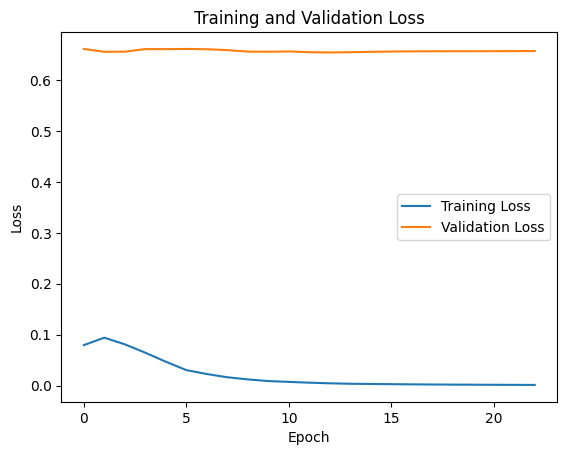

In [ ]:
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


CAPTION!!

plot (visualize) the prediction and the ground truth for the test data. What do you see? where is the model succesful where is it not?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


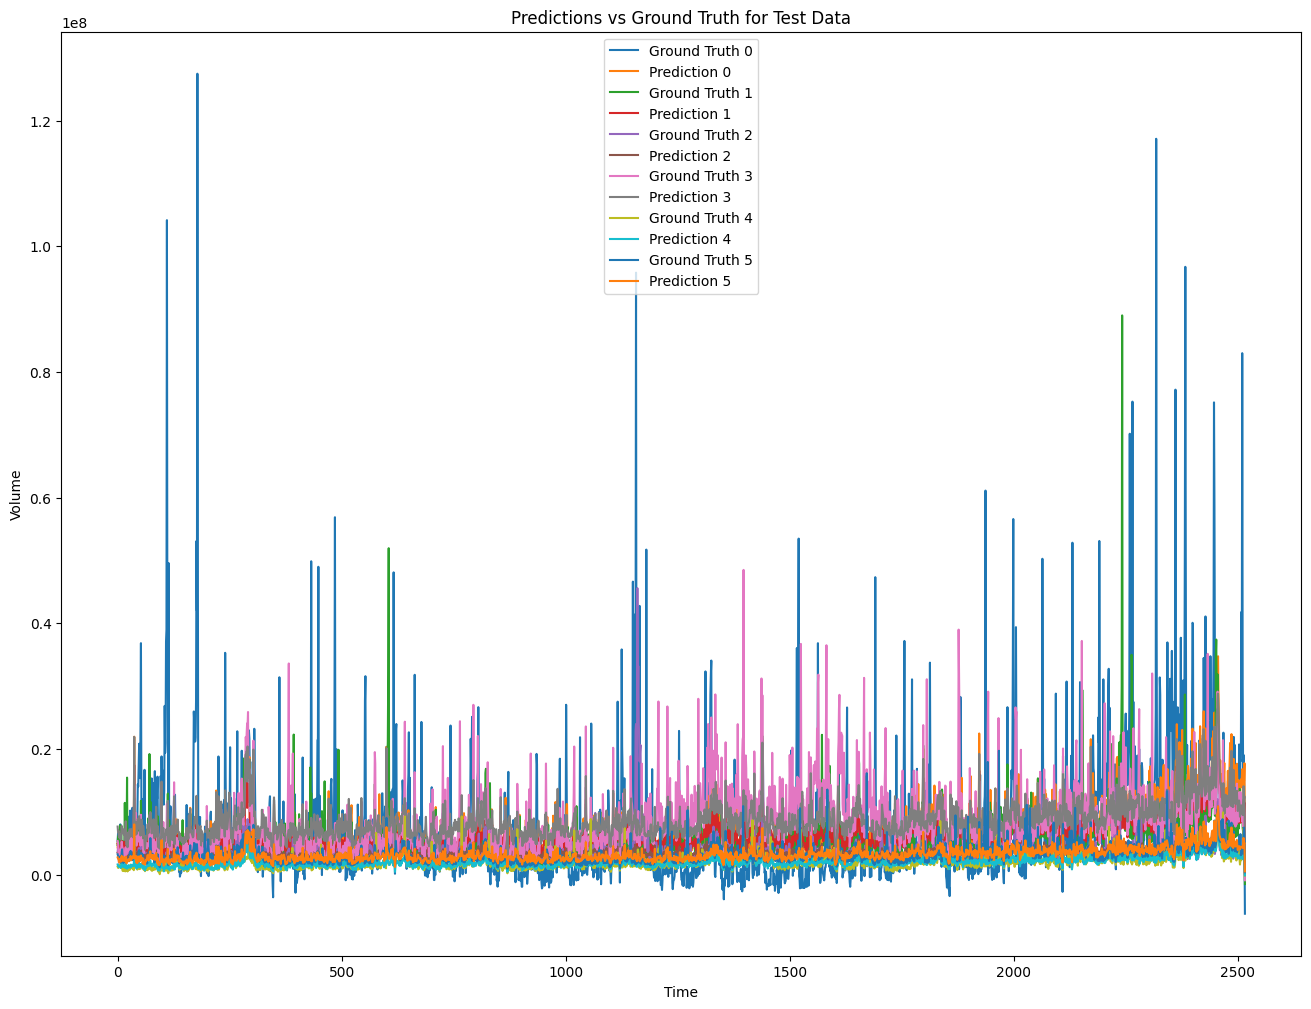

In [ ]:
# prompt: plot (visualize) the prediction and the ground truth for the test data. What do you see? where is the model succesful where is it not?

import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.losses import mean_squared_error as mse


# Load the best saved model
model = load_model('best_model.h5', custom_objects={'mse': mse}) # Pass mse to custom_objects

# Predict on the test data
predictions = model.predict(X_test)

# Inverse transform the scaled predictions and ground truth
predicted_data = np.zeros_like(predictions)
ground_truth_data = np.zeros_like(y_test)

for i in range(predictions.shape[0]):
    predicted_data[i, :] = scalers[i].inverse_transform(predictions[i, :].reshape(-1, 1)).flatten()
    ground_truth_data[i, :] = scalers[i].inverse_transform(y_test[i, :].reshape(-1, 1)).flatten()


# Plot the predictions and ground truth for the test data
plt.figure(figsize=(16, 12))

for i in range(len(X_test)):
    plt.plot(ground_truth_data[i], label=f'Ground Truth {i}')
    plt.plot(predicted_data[i], label=f'Prediction {i}')

plt.xlabel("Time")
plt.ylabel("Volume")
plt.title("Predictions vs Ground Truth for Test Data")
plt.legend()
plt.show()
# Analyze the plot to identify where the model is successful and where it's not
# Successful areas will show close alignment between prediction and ground truth
# Unsuccessful areas will show deviations, particularly in trends or magnitude


In [ ]:
for i,_ in enumerate(X_test):
  ......

CAPTION!!